In [1]:
%matplotlib inline
import re
import getpass
import gmaps
import requests
from bs4 import BeautifulSoup
from bs4 import SoupStrainer
from urllib.parse import urljoin
from IPython.display import clear_output, display
from parse import parse
import yaml
import time
import os
import sys
import pandas as pd
import xarray as xr
from shapely.wkb import loads
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry.point import Point
from shapely.ops import cascaded_union
import numpy as np
import matplotlib.pyplot as plt

import psycopg2
import json
from fabric2 import Connection

#adding prognos tools
sys.path.insert(0, "../../PROGNOS/")
from prognos_tools.encrypt import decryptString
from prognos_tools.Basin_fabric2 import Basin


storageToken=b'gAAAAABdiMKRN9CAWkwJjaORtRqmHmoAqR8j02XBp5PA18aPsIGdyMDAXN-pTYBjNAr0AaoZ6-kO2kS5x4fbFJFOZhk298W518PEhgQNIkot-dkCJfgk369_AEHoOtqUd84hnrpO5v1a58mu9VGA74KwEpEk3mDEdkZVPffPgK1y5B8Gp_s9_iqvPKP8EC4M-i1CVIhRIOVGEK4udkY-BYP-B20tYHarrbAigGwxeFxfpnSBQKUOtu4poU0GuJT0CLY7VUhqFb-0qTWQBmWqRg1e98_uMedZbGPjNKx1RAg7Z43-yb3M3OSFcaniRtXvzS5ScmVbsRuEWU2bR2hn2HWZY6m5oZdQPBWCoAknelAu7F3nMH3o-hGUciVDVaRGwGiD2qauyoPcbP0oP9kvjwSsysyFsomiRpewpaAkr2O85i0mXvehvGMMDZAKVFrCwJbXHR598ccCOp28Jo2-N91vadryW_-isdXF4vxKrlPwNDTqvy3m9WoxoeS98X5Z8U1cfbjVpy-UAzB16IzkivdkeOAteM_J6lZq2H5pnbG1TeF_f2kd3ul1FKV9xZGVxaBvT0G-YxjHM6HpYQn9O8rC_DfJUunoFToZp3VvG6hcTKjOl2inbaqqhcQ4RhavCymFFkR1FeMQ_2scNJcpiGUkI3GPGV7ujPlSpXVMkEViitT89thIIwsFL0IWvctJE35j42HArPhcEvvYWKBypt2Ok1jnVTNx7Vp4dE7V5HuXvkg65tjeHu2EFBVaIomhTdnqa2dUZ0Rj4F09J8s7NWA965V__LIp-30pSJaLKwAoRVs3DrkF11aV5EURNZyryXi6YwrLPCV5TodKvCmbCS-t1EVDpd50MX4KJErtuTAESvOQZTdFPMF0lR7ivMmc39luDOtSHupg0IiOqVaUVpw7GEF0FX4o4RZ61D4dx2xQ6nDBm0nyxOphGzkbHIGZmj9AnxTqVMDxfrFz9Edr2FBL4i3tORtIdGS_iDbiJvXm3fl1oYqe3bNqt_U-PKzlP9AXpsEkxyDPr6cNBqOE5coSFh9w1rJXfcdyQPt1p-57JydFQJmx2KvRmeYzXuruI1etqDF9eUzVVzC2GZfA__39-JFZMUDtNGsAwywbV6VB-xaNSi85wy7rjIitnWvo5tjqo1H8Hr-OFhrgvfKiXpWEF1_lBNIWqAnmPME8s-5CXIphMqKndp2ShMERviQX8C5aUosx3aIbnUboaUjxlIjiwCb1oXM_1_SRdoMmhKY87DibiRBJF_z1ouKmPnlUg-SAKYqh307Wd839PhlnxN8srVv8TdP7TkGlHZ_SoX6luloHB33Ejjuak0b0jG6o4yfyYgXHDDVkNRE7myeMhH4PKNqbLnG1USHxxsbT63h5R3LDwpU1MzjaGfEL3Mf86mTH6gsapWbImhtqlE1Orjq8Igx0O7tILowUBjmdBXcQw5Q4rhwe2ik-e18HnLycqCbq1ATcf2ldBmjpawzXUNVvZgqMq57eTraKgdM338gRT62Y2rVBZeFTURp-IIdN5NoWxBGnzFwyYPdq9aVXKtue9cDgeTHh3oP6lI9edu-baeGHi0bMzqPZppuht0-gZ1vVnEjapoMfj6hiqlfWUyG7Y4RqjQGabzAYxam0BhDXpSfvvoQCat02IyUG93d4gQQEjsyPQuVxV5pgKNA9YO99TqnKac2Xkr-zlqQyFe4J2NzkqDb-XSQXjOv2zkXaUZdFp54KnAb1iuc_tOgHZwpeMb_AkG9K_ACX2x7arG5slhNlUu-UXfLL5K9GdGXGQYJllyW3HTfi3ZjJthHn16fjMoxmzJU-qzqoKTT8HuU3sY9LLzKQJmlhpE915RDOsSlI6-znbTrqfGz_bm2putOb38HrH5i7ptR-ofCtblFa_jpYTx2R_A-2LSIokfOknXY7WPGciDY7YUzC_mz0SJYtNfQxF4ny6hKHVVh2Rt2XeP6-NsIqUaYrEDiFTz-kvXMA9MUQ70_z67oKr8dp8PK-kSPE_wdnjS1cUFVB1hhTm8HNsKqDNNB5byk7QN0GuTYXNk0hxKJK3i32UMclD8lLAP8Pa_nY4J47q84f3XSkNxJ571Lnr7RXSV88u3T6qnXWv0ciG4PAxXVwD_X2qpEY8-SyQqny2Yxw7xPbdwa7h6DrzXlzrk2pvI9KhEGuLtWMxiPOxiitDg0FEFJSHbfXZHKtqtFemav19nNrcBN-VbGLCt_bBVV4uuMs3W7nv-Y7MKFpKzQVdqYHbgbtSE3rgXQyLL_OirmxaBJz-DQXdystdR4epjtd1LNN8VXwnRv5Ln6siPPCy-QPp-ITKWe-ACsS3t3gIxTjgMpTVBbYp40OHfMwhk2iHDTA-DFlrilepwH8TWZG4LVl5fwHmv_rTpb_K01kv2_wAHZjCsNCtfTMiNjZTYepp3w_MbTG1KnV21L7UCi8ktj55W4vu4sh8REqiGfYDFhPJ444dae_-Wg_UdBwVrJtRWlPUW_m8V4kOgusQSgHPZCXR_SLAxWvbxd1MkzcXbIaCTj2hsseQFx3kUmNDj911E7rV1RbLRzaIFx6Weffy0U8mvrBh8kfZuHk8hAksdD-Ke4JC25ucn36y8MjGkV_bWf-h6I-2eijxg7da-3-R6EtPp8goTIkiFTO8IK84PEFnODhBvdGTYR81zMBmaYWnD3Ir0LZE4dGVc9jFYk22fZJ56httDKR130AsZ1B-nqlsfn-n9plJKoKWVjYLnfAI2TgOCndQCJ2fxkbjfS0x7eKCysUEijLX8vAqhwHCZOasikFlMGxmlHF-Ph_WunExoWhoxlvzP6FDny-0poTkllSRt9KN6rHn5rzqzxS-fSxW6GLnSn8Y7TsGpy0tn_KMRsGV5xbDJWFFMnvMf7hB1L9_Ut9fvzsX3Iz-O1ktqWnNQwBKi-MsFePpIXtKA4U8KQrWBf6TyASoqw79xVdlqbXwzYfg9Ur_kYh7nHXYKwP4oy2agTdYRzUydWi819NmgW_QFp72aUMGAKCxy5MpxJMDR_41OkQxyjuPHT_3HskCFjdcvUOgp0Hi8m-iU5D34PaVeGisC2H-rbyaS_ET3PtJ0kU1Xx3oF2xYM1q-4QB9qBxUyDdk5hBNxaoAslA8sE_Y1JfMzfyjIqK4OR5_noBkksj_f7tlezivS8eKmhClnSGboQVS5ypcEw5n8d-XQh8C58qKmQ2jUZOYyt6WBAD-TfzyqPxDX423z-Cuw=='
computeToken=b'gAAAAABdiMIg9OCnTJ3gsI_ZGqzRz2jbkLvVHtvw8stG7ljodd08gXOQFYuiclCtsPkSLgwvMiuro1QZw_8Y8txjIPBVOI313SGpfNj5UtfG1jZbNeMDMHJXz3w_be3a6JjsLJtXSmFNYrTKUJKioomQuugq0dI8oIgqQ5MrAx8hOheG1BB0lxW20UzE5W2izjXLqGhtBGQJVrvvt7j1-GFcDu-FvSEik4JQQK9miOJlfNfPUhY5wagCcC_FLmdc_9vmBVo7xprhGkQjFmO_EbQJVkNIteE0QWt77x2zPkuOowyMxfDAP9KyOte2q5vrrX27InZ4OXNdoAP56kFYJ0dvqiq7vkPK2cliroFo3fDgm-SyPxZx4S37ga8aOanpESKpKZke7ea-EQoAOQqGGk9OA8tVDa2kJNvZEoZLa0xPI1rBiMPna3PWHoinfO0C3ohuDYIUPYKWNrymNmrNvdtkUMD9COvAWGP-wEZ7S7iZN9NlBJ_uUmFVpTNGVwBrGCebxW3byN5CSxQ7zKHuvlWI0-sggUph58lTYq1FThwZ2YM0hPDmO4Wvlefneyf3OYAURfAjU4Z9v8SZc2EUgb8jHLscTwY1hQWdVFDEgxFJ2vLOXX3yvfPfzNw0Fz9OlU2hwLqyZNYE7XoZaC2A2ndl9OjsKalqeyAmUoyRx-EN1IAMt-cvMwCXCiCzKgu1tmObye_evqcW2KRZ2hgvUBXWX_gtqDLa9RumxnKw9mw8aTfqoCumK74Vr9c4L6csJOkJyoZCDeKyfvMRgIPnFR4GThTZjdBRE4jMFnPV5I_pjcfNSX8gEXoKuH7pcWSMmSUZ2-IPTZeJVBT4yFpamKuYhao67ZVOCeIg0RTwnywuQZK3VGNqL0c27z_L_Y7uW-T0MV-Z8wv0hxqOT5JQ_xl_OIVGCUitQRnrN_ZIECIr6lpdhYk8HH73yOGKGtR6lMFK7ww99z4fWFl5X0opYrbMpI5dJ8kxB7u85escismPL2FFvib4s69hzBPAdXVaos2j1aquixf3pYIOOtnQE1_H0-JHZnmtfg4SBIUvyFVeWpxgBfcgvS-3YiUJLf5BU9hiSYLMMzIJbQspKz_qh3rrcYwvYEyUffrqD2p-62D95YqL4SNtO0l9nnzCZ909b1sddEoF1W_qjxNFc92G3B0tqC8vgEp_3Ec1b3A8fPAmSHV1MEXfEhPLha_OUiKLA8tGCN9lA5kee4712SSO6C0ImImZt-UB2RnzKveqtUI6Id1qM4Evs_lDKiaIWl8kDL-dXROiTWsLbHY454n0RRmUYLnB2UXlVwUZwN8r12rbbTlQ8u6G-Zwujnb8Nex9PpdCQ2gV72-860TNWxPQHNUvOCbXKK3ZnolEPd_mtx0gXNO3N99nNc2G4h9Ro1zWHP8w2UWnBEYPLluqqCNc71w5Xw4rQeNlXSy9-UixdZzV-5JGXggj0cMMgC9dpdj_lagShtms5REijpEOMguhuSTLmYNNNXsPD7Lp7yz7qFCvdtQuIHYoqZXvuHEH3mbBr56C2eQ-m_VPVnO0zkB-1aWgRDm20g0xsxUH2oheVo85hSw_H7-lZNhMoBvn6M_owIrfo9ntm7k4DGWHqVdzHXL30S2QarUvR1r7oq4E4SJKhgsZp4OphXJs6mzSNCUWEabcsKwx9wSXJex1PuWypIASji5sweL97kSWxz-7K26DUx73C7jFzDhKk4zwTm5bj08qc1juN7KJl6xKMdeRMb-qI7jeL_W8lqqscKRXCmzGsDuYwpq5zP3z76C2-YCVMZS5fuI299AwPkzhG5aYc-2yaRaHW-dIDnwdzHdGnC5EL1MH6SUdeCw1vhdbD42gEKOc-FJGZdsFdbVKN4iHKiP7Ewp5RcxOmZEnXOVFDz2mDj_oXJXuuxj7EpGhSltGo58CpqDp9PXMqSqZ25mRB2ZUNHyKQxDtiItdnZzfXRbe0l_2oWrDdygvPbaUiV7pNf9V_owZpAKw0pEN_mQ0TbKbPDs-0RkImfLHUN8en26XDtUSVMlyH_coyAzTYpxpzhOclcTCq-qt9BmWPUd95ns4Qst5JLHXE5eA4aaFqAgKxyFtDIBb3G_cfCF4yjYxzmC3g7HgU0mQXAzzJ3-f8GYJeaVNLzKSnhx_lEDgvzhokc3dAiL6wyxqPgkYq6VvjqGqA1s85673gbKXB2wtfCKjaU2HcYZxPooX9JSWLUJ7dmwJm7CPUzLUPNu3jrk0LUJVe9MAugiKAgOj823uT-TiS4vu3M25uEs2Z8wJ38G-_8T24AYQkAUQuBTsVMssDIW8p_Yz2SWPwaJN9rzNIA_CI0JI0k60kWOmdNEPqjdcxAZgmCUBjanjhc8gxlMtVxbOSqewi95hNuuyd7gXKiRKvb4sMpqXviKe3HKFqdRvmfFBaWYKymLOx0-bxhwZkwjpZeKlh3oK4QCXbMedJ1pPOHY4nCfh4_TSbIKQPlC68ItsmsRENaiffwXz0mEQbYVCkWZ_gYnSER9Lc5P4-GBE3nQtxLEHOQQra0d5g0TLMDx0WjRv1M8hGZ8zUBHILuab_Y0jOURKYtJJLNIyHhH0qdFktk_0CoJplzL1Vu03ZUYGIS7zoEAFio9-MTGZ-zBuPow7flAS0V3VnSxRDlgY8Fn_Uc044EMlQ0Oszz8vIpUtAf9oAWpvu-wmtYrU2I2mrLUyxf2doG0O5lMwhEC7WKBaI4YYzwSt5NTaAZFVy-pe6hq4f0NBlvB083Gi5-eT_s9qOsagf2Rd9ssV9aZY4QNuqobTZTIOFqytZrraRfGAClGyppZlLrIlkOexIJBGEcwObYLhdPipdazozE4FRLjhDrAFqutE8yHeR_irOJ-20x8AYxp3q4xjR0D5xeyVy6RgWm8hhhEoPEX9XZkFrwho1J_TOuEAWCDy6D2pdK1DEcJmEE8MEUVKGJn4q6Rtn8uHSN8iz5dzwqifQFlgRDQahWUwOJhvQ1PgQSegeR2-bjRkWix2ap8CMFXcJAOwE01WggE8PSYhP9JKrSUsJPEJVOPwImWnvUhoQfsi6u4TeMqAvwOy87Z1NKIBleHAky1YwICJSnMmRPGHoB-Xfq32p3nG5XlHCsB1jr7FRifGqKoyA22hSHspqA7ZpwwitDLw3lzJ0HfZsuG91e2rAx2I5h0khw=='
gmapsToken=b'gAAAAABctxJp5wE73qK6U5VieCi0WXNnNex4KxLZHutsESa8fW9v43lLa1Ag0qsxKFjXXo9MBAdvUpqJPW-QmCE0gH_Opf9g4xAG1VaI2WarO_xDZg44VLMCHkd_6O8ofgp8u4VuFBMr'
key = getpass.getpass('Password: ')
apiKey = decryptString(gmapsToken,key)
computeKey =  json.loads(decryptString(computeToken,key))
storageKey =  json.loads(decryptString(storageToken,key))
with open('compute.json','w') as f:
    json.dump(computeKey,f)
with open('storage.json','w') as f:
    json.dump(storageKey,f)
gmaps.configure(api_key=apiKey)
del key,apiKey,computeKey,storageKey

#Creating folder to store temporary files and downloaded data
saveFolder = './DownloadedData/'

args = [saveFolder,]
!!rm -rf {args[0]} && mkdir -p {args[0]}

Password:  ·······


[]

# Getting list of openDAP links with high-resolution (1km2) temperature and precipitation data

In [2]:
getList = False

baseURL = 'http://thredds.met.no/thredds/catalog/ngcd/version_19.09/catalog.html'
# varsToGet = ['TX','TN','TG','RR']
varsToGet = ['RR','TG']
model = 'type2'
listFolder = os.path.abspath('./' + model + 'Lists') #Folder where list of links will be saved

args=[]
if getList:
    with Connection('localhost') as c:
        c.local('rm -rf {}'.format(listFolder))
        c.local('mkdir {}'.format(listFolder))
    

only_a_tags = SoupStrainer("a", href=True)

def getSoup(url,re_str):
    request=requests.get(url)
    soup=BeautifulSoup(request.content,'lxml',parse_only=only_a_tags)
    link_soup=soup.find_all('a',text=re.compile(re_str))
    links=[]
    for i in link_soup:
        links.append(urljoin(url,i['href']))
    return links

def getFileList(var):
    allLinks=[]
    for var_link in getSoup(baseURL,var):
        for model_link in getSoup(var_link,model):
            for year_link in getSoup(model_link,'^[0-9]{4}/$'):
                print('Processing {}'.format(year_link))
                for month_link in getSoup(year_link,'^[0-9]{2}/$'):
                    for day_link in getSoup(month_link,'\\.nc$'):
                        for opendap_link in getSoup(day_link,'^/thredds/dodsC/'):
                            allLinks.append(re.sub(r'\.html$', '', opendap_link))
    return allLinks
    
# display(listFolder)
if getList:
    links = []
    for i in varsToGet:
        #Getting all links for variable
        links.append(getFileList(i))
        #Saving paths to file
        with open(os.path.join(listFolder , i + '_' + model + '.txt'), 'w') as f:
            for item in links[-1]:
                f.write("%s\n" % item)

## Querying extent of the basin
### Creating a VM with the geodatabase on it

In [3]:
#Testing connection to google cloud
cloudInfo = {'project': 'nivacatchment',
             'zone': 'europe-west3-a',
             'instanceType' : "n1-standard-4",
             'instanceName' : "basin",
             'username' : "jose-luis",
             'keyDir' : './'
             }
basin=Basin('compute.json',cloudInfo,'storage.json')
display(basin.properties)

info = basin.get('projectInfo')
display('Can now talk to project {}'.format(info['name']))


#Setting ssh firewall for project
inOffice = False
if not inOffice:
    with Connection('localhost') as c:
        basin.setSSHPort(c.local('curl https://ipinfo.io/ip').stdout.strip(),inOffice=False)
else:
    basin.setSSHPort()

#Actually instantiating the machine
ip=basin.instantiate(wait=True) #wait until the vm is actually up and running
display(ip)

#Allowing local connections on the VM without password by modifying the pg_hba.conf file
with Connection(host=basin.properties['ip'],
                user=basin.properties['username'],
                connect_kwargs={"key_filename": basin.properties['keyFile'],}
                ) as c:
    c.sudo('''find /etc -name pg_hba.conf -exec sed -i 's|\(^host \+all \+all \+::1/128 \+\).*|\\1trust|g' {} \; ''')
    c.sudo("service postgresql restart")


#Defining custom queries to geodatabase. Note that we forwarded the port on the VM to the
#local 5432 port so as to be able to talk to postgresql through the local port
def query(query,fetch=True):
    with Connection(host=basin.properties['ip'],
                    user=basin.properties['username'],
                    connect_kwargs={"key_filename": basin.properties['keyFile']}).forward_local(5432):
        db = psycopg2.connect(host='localhost', port=5432, database='geonorway')
        cursor = db.cursor()
        cursor.execute(query)
        if fetch:
            return(cursor.fetchall()) 

#Setting up the connection    
basin.setConnection()

['Sep 23 14:43:27 basin systemd[1]: Startup finished in 1.360s (kernel) + 1min 55.222s (userspace) = 1min 56.582s.']

'34.89.200.74'

### Getting basins extent

In [4]:
schema = 'metno'
station =  'Vansjø'
stationsFile = '{}.yaml'.format(station)
stations = yaml.safe_load(open(stationsFile))
display(station)
#Actually processing the basin
geoResultsFolder='./geoResults'
basin.getBasinLayers(stationsFile,schema,saveFolder=geoResultsFolder)

basin.setConnection()
sql = '''UPDATE metno.resultsshp AS a
SET basin = (SELECT ST_Union(b.basin)
FROM metno.resultsshp AS b
WHERE b.station_id = 0 OR b.station_id = 1)
WHERE a.station_id = 1;
DELETE FROM metno.resultsshp AS a WHERE a.station_id = 1;
ALTER TABLE metno.resultsshp
ADD COLUMN area DOUBLE PRECISION;
UPDATE metno.resultsshp
SET area = (ST_Area(basin));
'''DROP ROLE IF EXIST jovyan;
CREATE ROLE jovyan;
GRANT CONNECT ON DATABASE geonorway TO jovyan;
GRANT USAGE ON ALL TABLES IN SCHEMA metno TO jovyan;
GRANT SELECT ON ALL TABLES IN SCHEMA metno TO jovyan;

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geonorway -f sql.sql')
basin.connection.run('rm sql.sql')
# basinGenerator.kill()


[{'station': {'buffer': 50000,
   'epsg': 4326,
   'station_id': 1,
   'longitude': 5.5497054,
   'latitude': 58.6703701,
   'station_name': 'Håelva'}}]

'Directory should be created'

Gonna create the getBasin.sh file
./geoResults/getBasin.sh


NOTICE:  table "stations" does not exist, skipping


 initializestations 
--------------------
 
(1 row)

 addstations 
-------------
 
(1 row)



NOTICE:  schema "metno" does not exist, skipping


 initializeresultsschema 
-------------------------
 
(1 row)



NOTICE:  table "buffertable" does not exist, skipping


 createdatatable 
-----------------
 
(1 row)

 createresultstable 
--------------------
 
(1 row)

1
Initializing... 
Done (postgis major version: 2).
Output shape: Point
Dumping: X [1 rows].
Gage Watershed version 5.3.8
Input file PG:dbname=geonorway schema=metno table=flow column=rast where='station_id=1' mode=2 has projected coordinate system.


This run may take on the order of 1 minutes to complete.
This estimate is very approximate. 
Run time is highly uncertain as it depends on the complexity of the input data 
and speed and memory of the computer. This estimate is based on our testing on 
a dual quad core Dell Xeon E5405 2.0GHz PC with 16GB RAM.


Size: 4
Read time: 1.975850
Compute time: 0.467081
Write time: 0.330607
Total time: 2.773538
Creating output basin1.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.


Shapefile type: Polygon
Postgis type: POLYGON[2]


SET
SET


ERROR:  column not found in geometry_columns table
CONTEXT:  PL/pgSQL function dropgeometrycolumn(character varying,character varying,character varying,character varying) line 34 at RAISE
SQL statement "SELECT DropGeometryColumn('',$1,$2,$3)"
PL/pgSQL function dropgeometrycolumn(character varying,character varying,character varying) line 5 at SQL statement


DROP TABLE
BEGIN


NOTICE:  table "dummy" does not exist, skipping


CREATE TABLE
ALTER TABLE
                addgeometrycolumn                
-------------------------------------------------
 metno.dummy.geom SRID:3035 TYPE:POLYGON DIMS:2 
(1 row)

INSERT 0 1
COMMIT
ANALYZE
INSERT 0 1
DROP TABLE
COPY 1
COPY 1
COPY 1


### Displaying basins

In [5]:
with open(os.path.join(geoResultsFolder,'gmaps.txt'), 'r') as f:
    lines = f.read().splitlines()
    
fig = gmaps.figure()
fig.add_layer(gmaps.geojson_layer(yaml.safe_load(lines[0])))

lines[2:] = [i.split(';') for i in lines[2:]]
outlets = [{"name": i[0], "area": i[3]} for i in lines[2:]]
locations = [(float(i[2]),float(i[1])) for i in lines[2:]]
info_box_template = """
<dl>
<font color="black">
<dt>Name</dt><dd>{name}</dd>
<dt>Area</dt><dd>{area} km<sup>2</sup></dd>
</font>
</dl>
"""                                                
outlet_info = [info_box_template.format(**outlet) for outlet in outlets]                                                 
marker_layer = gmaps.marker_layer(locations, info_box_content=outlet_info)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

# Getting data from metno thredds servers
## Creating a virtual machine with the fimex utility

In [11]:
#Testing connection to google cloud
hasBeenDownloaded = True
if not hasBeenDownloaded:
    cloudInfo = {'project': 'nivacatchment',
                 'zone': 'europe-west3-a',
                 'instanceType' : "n1-standard-16",
                 'instanceName' : "fimex",
                 'username' : "jose-luis",
                 'keyDir' : './',
                 'image' : "projects/nivacatchment/global/images/fimex"
                 }

    fimex = Basin('/home/jose-luis/Envs/gce_framework/code/keys/nivacatchment.json',cloudInfo)
    fimex.instantiate(wait=True)
    fimex.setConnection()

['Sep 11 09:04:28 fimex systemd[1]: Startup finished in 3.766s (kernel) + 3min 54.892s (userspace) = 3min 58.659s.']

## Creating cfg file for download

In [12]:
cfgTemplate='''[extract]
reduceToBoundingBox.south={south}
reduceToBoundingBox.north={north}
reduceToBoundingBox.west={west}
reduceToBoundingBox.east={east}
selectVariables={variable}
'''

## Getting all variables for all basins using fimex

In [13]:
#Getting all boundaries to download:

geoResultsFolder='./geoResults'
script = '''#! /bin/bash
n=$((`nproc` * 2))
rm -rf ./tmp
mkdir ./tmp
ulimit -n 1024
cat {fileList} | parallel --eta --jobs $n -u --no-notice "fimex -c {cfgFile} --input.file={{}} --output.file=./tmp/{{/}} > /dev/null 2>&1" 
ncrcat ./tmp/*.nc {out}
rm -rf ./tmp
'''
#> /dev/null 2>&1

if not hasBeenDownloaded:
    args=[]
    with open(os.path.join(geoResultsFolder,'box.txt'), 'r') as f:
        lines = f.read().splitlines()
    boxes = [parse('BOX({west} {south},{east} {north})',i.split(';')[1]) for i in lines]
    names =  [re.split(';|,|\s',i)[0] for i in lines]
    # import os
    for i in varsToGet:
        #Getting only dates from 2010 to 2016
        args = [os.path.join(listFolder, 
                              i + '_' + model
                             ), 
                 "1970", "2019"
                ]
        !cat {args[0]}.txt |  grep -E '/'`seq -s /\|/ {args[1]} {args[2]}`'/' > {args[0]}_mini.txt
       # fimexGenerator.callPopen('head -n 40 {0}.txt > {0}_mini.txt'.format(i + '_' + model))
        currentDict = boxes[0].named
        currentDict['variable'] = i
        display(currentDict)
        with open('box.cfg','w') as f:
            f.write(cfgTemplate.format(**currentDict))
        for j in names:
            filename = i + '_' +  model + '_mini.txt'
            display("Downloading from all files in  {}".format(filename))
            with open('script.sh', 'w') as f:
                out = j+'_'+i + '.nc' 
                f.write(script.format(fileList=filename,
                                      cfgFile='box.cfg',
                                      out=out)
                        )
            fimex.connection.put( os.path.join(listFolder, filename) )
            fimex.connection.put('box.cfg')
            fimex.connection.put('./script.sh')
            fimex.connection.run('chmod +x {}'.format('./script.sh'))
            fimex.connection.run('./script.sh')
            fimex.connection.get(out,'./'+out)
            fimex.connection.run('rm -rf box.cfg script.sh {} {} ./tmp'.format(filename,out) )


{'west': '5.5056659357869',
 'south': '58.5910806925643',
 'east': '5.98803615213093',
 'north': '58.775809613116',
 'variable': 'RR'}

'Downloading from all files in  RR_type2_mini.txt'


Computers / CPU cores / Max jobs to run
1:local / 16 / 32

Computer:jobs running/jobs completed/%of started jobs/Average seconds to complete
ETA: 0s Left: 0 AVG: 0.10s  local:0/17713/100%/0.1s 


{'west': '5.5056659357869',
 'south': '58.5910806925643',
 'east': '5.98803615213093',
 'north': '58.775809613116',
 'variable': 'TG'}

'Downloading from all files in  TG_type2_mini.txt'


Computers / CPU cores / Max jobs to run
1:local / 16 / 32

Computer:jobs running/jobs completed/%of started jobs/Average seconds to complete
ETA: 0s Left: 0 AVG: 0.10s  local:0/17713/100%/0.1s 


## Intersecting basin and nc file 

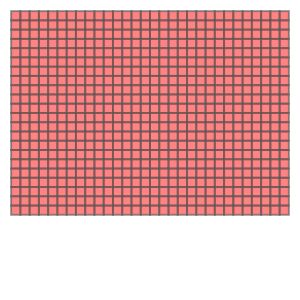

In [14]:
# Creating a grid from the nc file

temperatureFile = os.path.abspath('{}_TG.nc'.format(station)) #'./'/home/jose-luis/Downloads/hist_CNRM_CCLM_RR_daily_mm_1971.nc
nc_data = xr.open_dataset(temperatureFile)
#temperature = nc_data.precipitation__map_hist_daily
temperature = nc_data.TG
nc_shape = temperature.shape
#X = nc_data.Xc.values
# Y = nc_data.Yc.values,
X = nc_data.X.values
Y = nc_data.Y.values
# lat = nc_data.lat.values
nc_data.close()

#Y=Y[0]

cnt = 0
grid = list()
for i in X:
    for j in Y:
        left = i-500
        right = i+500
        bottom = j-500
        top = j+500
        p1 = Point(left,bottom)
        p2 = Point(left,top)
        p3 = Point(right,top)
        p4 = Point(right,bottom)
        pointList = [p1,p2,p3,p4,p1]
        poly = Polygon([[p.x,p.y] for p in pointList])
        poly.sid = cnt 
        grid.append(poly)
        cnt += 1

grid = MultiPolygon(grid)  
display(grid)


In [15]:
transform = False#True
if transform:
    import pyproj
    from shapely.ops import transform

    project = pyproj.Transformer.from_proj(
        pyproj.Proj(init='epsg:32633'), # source coordinate system
        pyproj.Proj(init='epsg:3035')) # destination coordinate system

    grid = transform(project.transform, grid) 
    display(grid)

In [19]:
# Uploading the grid to the geodatabase
sql = '''UPDATE metno.resultsshp SET basin = ST_MakeValid(basin); 
DROP TABLE IF EXISTS metno.dataBoundaries;
CREATE TABLE metno.dataBoundaries(sid SERIAL PRIMARY KEY, boundary geometry(MULTIPOLYGON, 3035) );
INSERT INTO metno.dataBoundaries(boundary) VALUES (ST_SetSRID('{hexStr}'::geometry,3035));
DROP INDEX IF EXISTS metno_data_boundary_gix;
CREATE INDEX metno_data_boundary_gix ON metno.dataBoundaries USING GIST(boundary);
DROP INDEX IF EXISTS metno_basins_gix;
CREATE INDEX metno_basins_gix ON metno.resultsShp USING GIST(basin);
'''.format(hexStr=grid.wkb_hex)

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geonorway -f sql.sql')
basin.connection.run('rm sql.sql')

UPDATE 1


psql:sql.sql:2: NOTICE:  table "databoundaries" does not exist, skipping


DROP TABLE
CREATE TABLE
INSERT 0 1


psql:sql.sql:5: NOTICE:  index "metno_data_boundary_gix" does not exist, skipping


DROP INDEX


psql:sql.sql:7: NOTICE:  index "metno_basins_gix" does not exist, skipping


CREATE INDEX
DROP INDEX
CREATE INDEX


<Result cmd='rm sql.sql' exited=0>

In [20]:
# Intersecting grid with basin and getting area of the intersection
sql = '''
DROP TABLE IF EXISTS test_dump;
CREATE TABLE test_dump AS
SELECT (ST_Dump(boundary)).path[1] as sid, (ST_Dump(boundary)).geom as geom
FROM metno.dataBoundaries;

CREATE INDEX dump_idx ON test_dump USING GIST(geom);

DROP TABLE IF EXISTS subdivided_geoms;
CREATE TABLE subdivided_geoms AS
SELECT ST_Subdivide(basin,32) AS geom
FROM metno.resultsShp
WHERE station_name ='{}';

CREATE INDEX subdivided_idx ON test_dump USING GIST(geom);

DROP TABLE IF EXISTS metno.areas;
CREATE TABLE metno.areas AS
WITH biglim AS (
    SELECT a.sid,ST_Area(ST_Intersection(b.geom, a.geom)) AS area FROM  test_dump AS a, subdivided_geoms AS b
    WHERE ST_Intersects(a.geom,b.geom)
) 
SELECT sid,SUM(area) as area FROM biglim
GROUP BY sid;
'''.format(station)

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geonorway -f sql.sql')
basin.connection.run('rm sql.sql')

areas = query('SELECT * from metno.areas;')

DROP TABLE


psql:sql.sql:2: NOTICE:  table "test_dump" does not exist, skipping


SELECT 660


psql:sql.sql:9: NOTICE:  table "subdivided_geoms" does not exist, skipping


CREATE INDEX
DROP TABLE
SELECT 250
CREATE INDEX


psql:sql.sql:17: 

DROP TABLE


NOTICE:  table "areas" does not exist, skipping


SELECT 217


Socket exception: Connection timed out (110)


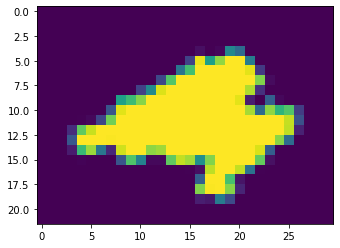

In [21]:
#Getting weight array from area file
#weights = pd.read_csv( os.path.join(geoResultsFolder,'areas.txt'),delimiter=';', header=None, names=['idx','area'])

idx = [i[0] for i in areas] #weights.idx.values
weight = [i[1] for i in areas] #weights.area.values
#Getting the in a 2d array
weightArray = np.zeros((nc_shape[1:]))
arrayIdx = np.unravel_index(idx,nc_shape[2:0:-1])
for i,j,k in zip(arrayIdx[1],arrayIdx[0],weight):
    weightArray[i][j] = k;

plt.imshow(weightArray)

In [22]:
np.savetxt('{}_weights.txt'.format(station),weightArray)

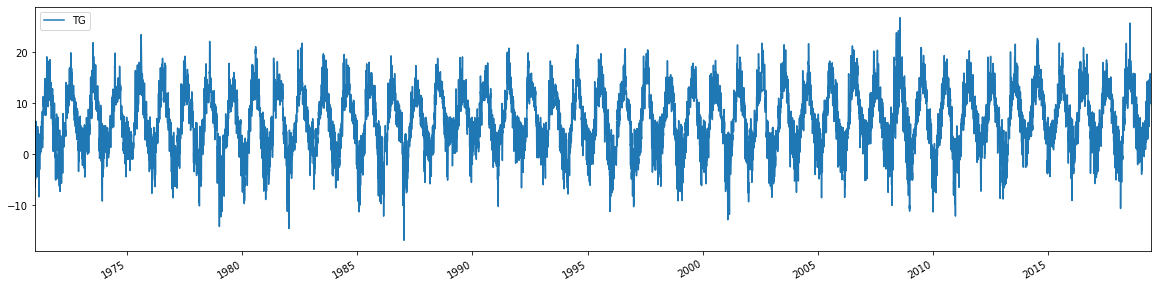

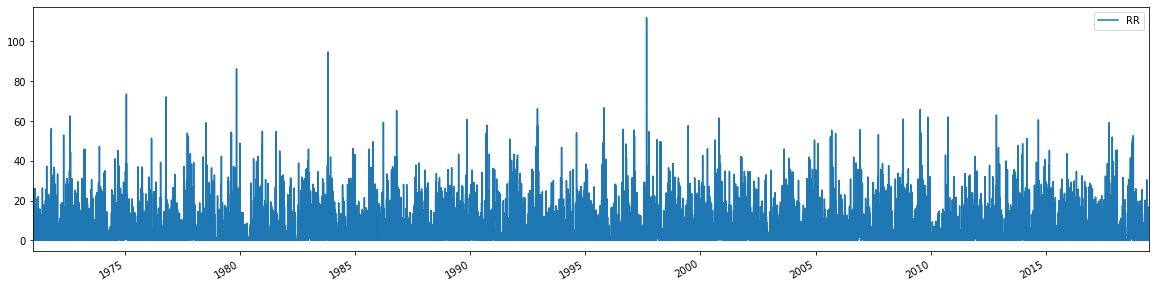

In [23]:
# Getting area-weighted data
def getWeightedData(filename,variable,save=True,isTemperature=False):
    nc_data = xr.open_dataset(filename,chunks={'time':1000})
    time = nc_data.time.values
    total_weight = sum(weight)
    data = np.sum(np.sum((nc_data.variables[variable] * weightArray)/total_weight,axis=1),axis=1)
    if isTemperature:
        data-=273.15
    nc_data.close()
    if save:
        data_df = pd.DataFrame({variable:data},index=time)
        data_df.to_pickle('./{}.pickle'.format(variable))
        data_df.to_csv('./{}.csv'.format(variable))
    return data_df

temperature_df = getWeightedData(os.path.abspath('./{}_TG.nc'.format(station)),'TG',isTemperature=True)
temperature_df.plot(figsize=(20,5))
fig=plt.gcf()
fig.savefig('temperature.png')

rain_df = getWeightedData(os.path.abspath('./{}_RR.nc'.format(station)),'RR')
rain_df.plot(figsize=(20,5))
fig=plt.gcf()
fig.savefig('rain.png')

rain_df.to_csv("{}_rain.csv".format(station))
temperature_df.to_csv("{}_temperature.csv".format(station))

In [24]:
basin.delete('instanceInfo')
fimex.delete('instanceInfo')

{'id': '9102720351818052109',
 'name': 'operation-1568197858268-592448447946f-361f6f29-128e7bc7',
 'zone': 'https://www.googleapis.com/compute/v1/projects/nivacatchment/zones/europe-west3-a',
 'operationType': 'delete',
 'targetLink': 'https://www.googleapis.com/compute/v1/projects/nivacatchment/zones/europe-west3-a/instances/fimex',
 'targetId': '3662043681769458045',
 'status': 'RUNNING',
 'user': 'workshop-key@nivacatchment.iam.gserviceaccount.com',
 'progress': 0,
 'insertTime': '2019-09-11T03:30:58.720-07:00',
 'startTime': '2019-09-11T03:30:58.769-07:00',
 'selfLink': 'https://www.googleapis.com/compute/v1/projects/nivacatchment/zones/europe-west3-a/operations/operation-1568197858268-592448447946f-361f6f29-128e7bc7',
 'kind': 'compute#operation'}